In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Video Game Agression/Effects of Violent Video Games On Aggression CSV MSDOS.csv')
df.head()

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",...,there are people who pushed me so far that we begin fighting,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes


In [10]:
df.columns = [
    col.strip().replace(" ", "_").replace("/", "_").replace('"', '').lower().rstrip('?')
    for col in df.columns
]

df['what_is_your_age'] = pd.to_numeric(df['what_is_your_age'], errors='coerce')

In [11]:
df.head()

,timestamp,what_is_your_age,gender,class,city__residencial_status,type_of_family,what_type_of_video_games_do_you_typically_play,name_the_video_game_you_usually_play,how_many_hours_do_you_play_video_games_in__a_day,how_much_time_do_you_play_violent_video_games_specifically,...,there_are_people_who_pushed_me_so_far_that_we_begin_fighting,i_know_that_some_so_called_friends_talk_about_me_behind_my_back,my_friends_say_that_i_am_a_bit_argumentative,sometimes_i_lose_temper_for_no_good_reason,i_get_into_fights_a_little_more_than_a_normal_person,sometimes_i_can_not_control_the_feeling_to_hit_another_person,i_sometimes_get_too_much_jealous_from_people,i_dont_know_why_sometimes_i_feel_bitter_about_things,"have_you_ever_been_involved_in_delinquent_behaviour?_like_stealing,_breaking_things_of_others",do_you_believe_that_playing_violent_video_games_can_lead_to_aggressive_behavior_in_real_life
0,7-11-2023 22:16:49,20.0,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18.0,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16.0,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19.0,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19.0,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes


In [15]:
string_columns = df.select_dtypes(include=['object']).columns

likert_cols = [
    col for col in string_columns
    if df[col].dropna().str.contains('agree|disagree', case=False).any()
]

binary_cols = [
    col for col in string_columns
    if df[col].dropna().str.lower().isin(['yes', 'no']).all()
]

In [16]:
for col in likert_cols:
    df[col] = df[col].astype('category')

for col in binary_cols:
    df[col] = df[col].str.lower().astype('category')

In [23]:
df = df.dropna()
df.head()

,timestamp,what_is_your_age,gender,class,city__residencial_status,type_of_family,what_type_of_video_games_do_you_typically_play,name_the_video_game_you_usually_play,how_many_hours_do_you_play_video_games_in__a_day,how_much_time_do_you_play_violent_video_games_specifically,...,there_are_people_who_pushed_me_so_far_that_we_begin_fighting,i_know_that_some_so_called_friends_talk_about_me_behind_my_back,my_friends_say_that_i_am_a_bit_argumentative,sometimes_i_lose_temper_for_no_good_reason,i_get_into_fights_a_little_more_than_a_normal_person,sometimes_i_can_not_control_the_feeling_to_hit_another_person,i_sometimes_get_too_much_jealous_from_people,i_dont_know_why_sometimes_i_feel_bitter_about_things,"have_you_ever_been_involved_in_delinquent_behaviour?_like_stealing,_breaking_things_of_others",do_you_believe_that_playing_violent_video_games_can_lead_to_aggressive_behavior_in_real_life
1,7-11-2023 23:01:27,18.0,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,...,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16.0,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19.0,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,...,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19.0,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,...,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes
5,7-11-2023 23:17:28,18.0,male,Bachelor,Pakistan Lahore,joint,action,PubG,less than 1 hour,less than 1 hour,...,Disagree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,no,yes


In [26]:
df.describe(include ='all')

,timestamp,what_is_your_age,gender,class,city__residencial_status,type_of_family,what_type_of_video_games_do_you_typically_play,name_the_video_game_you_usually_play,how_many_hours_do_you_play_video_games_in__a_day,how_much_time_do_you_play_violent_video_games_specifically,...,there_are_people_who_pushed_me_so_far_that_we_begin_fighting,i_know_that_some_so_called_friends_talk_about_me_behind_my_back,my_friends_say_that_i_am_a_bit_argumentative,sometimes_i_lose_temper_for_no_good_reason,i_get_into_fights_a_little_more_than_a_normal_person,sometimes_i_can_not_control_the_feeling_to_hit_another_person,i_sometimes_get_too_much_jealous_from_people,i_dont_know_why_sometimes_i_feel_bitter_about_things,"have_you_ever_been_involved_in_delinquent_behaviour?_like_stealing,_breaking_things_of_others",do_you_believe_that_playing_violent_video_games_can_lead_to_aggressive_behavior_in_real_life
count,142,142.000000,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
unique,142,NaN,2,48,46,3,18,95,5,5,...,5,5,5,5,5,5,5,5,2,2
top,7-11-2023 23:01:27,NaN,male,12th,Lahore,joint,sports,Pubg,less than 1 hour,less than 1 hour,...,Disagree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,no,yes
freq,1,NaN,101,56,57,99,41,23,51,72,...,51,52,40,47,55,46,42,53,101,94
mean,NaN,18.954750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.517653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
for col in df.select_dtypes(include='category').columns:
    print(f"Value counts for {col}:\n", df[col].value_counts(), "\n")


Value counts for some_of_my_friends_think_i_am_hothead:
 some_of_my_friends_think_i_am_hothead
agree                         41
niether disagree nor agree    35
disagree                      32
strongly disagree             28
strongly agree                 6
Name: count, dtype: int64 

Value counts for if_i_have_to_resort_to_violence_to_protect_my_rights,_i_will:
 if_i_have_to_resort_to_violence_to_protect_my_rights,_i_will
Agree                         49
Neither agree nor disagree    29
Disagree                      25
Strongly disagree             24
Strongly agree                15
Name: count, dtype: int64 

Value counts for when_people_are_especially_nice_to_me,_i_wonder_what_they_want:
 when_people_are_especially_nice_to_me,_i_wonder_what_they_want
Agree                         64
Neither agree nor disagree    30
Disagree                      21
Strongly agree                18
Strongly disagree              9
Name: count, dtype: int64 

Value counts for i_tell_my_friends_openl

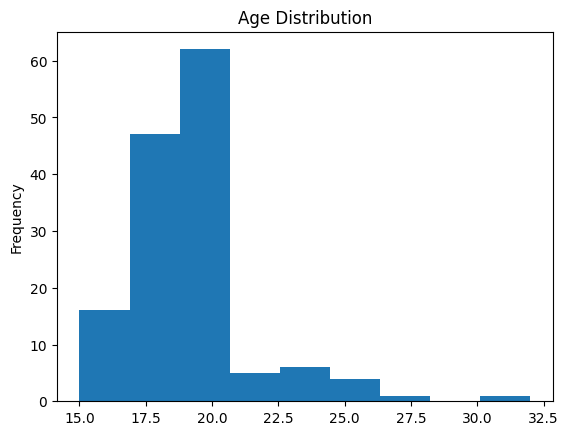

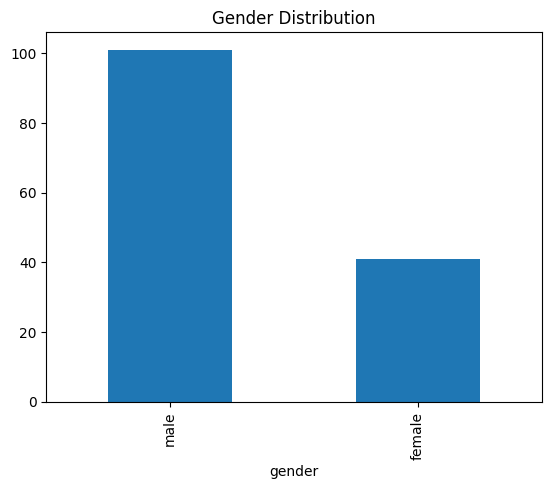

In [31]:
df['what_is_your_age'].plot(kind='hist', bins=9, title='Age Distribution')
plt.show()

df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()



In [40]:
group_analysis = df.groupby('how_much_time_do_you_play_violent_video_games_specifically')['what_is_your_age'].mean()
print(group_analysis)

how_much_time_do_you_play_violent_video_games_specifically
less than 1 hour    19.207348
more than 1 hour    19.030648
more than 2 hour    18.673506
more than 3 hour    17.888889
more than 5 hour    18.385816
Name: what_is_your_age, dtype: float64


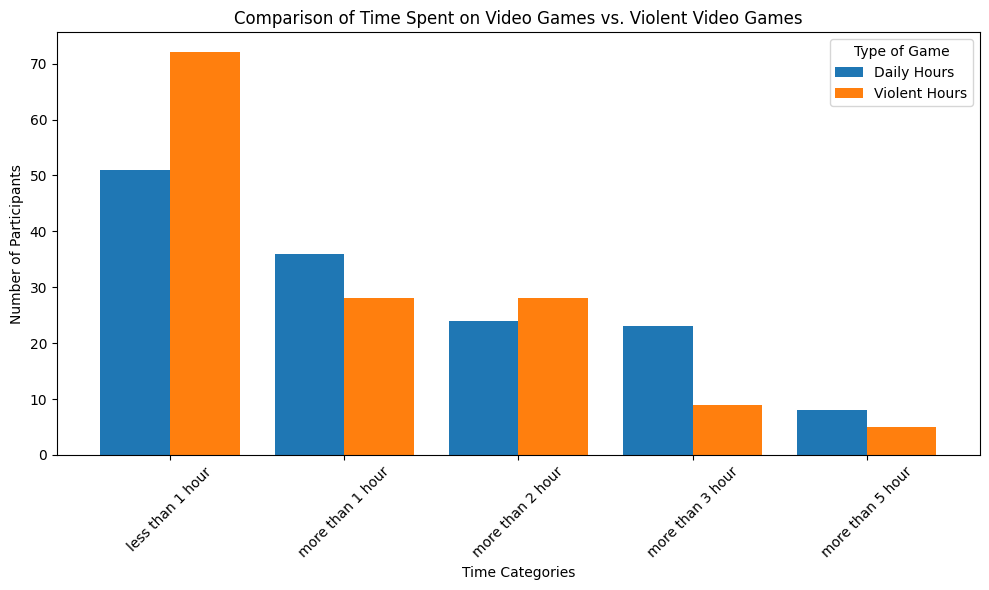

In [33]:
daily_hours = df['how_many_hours_do_you_play_video_games_in__a_day'].value_counts()
violent_hours = df['how_much_time_do_you_play_violent_video_games_specifically'].value_counts()

# Align the two datasets by index to ensure proper comparison
combined_data = pd.DataFrame({'Daily Hours': daily_hours, 'Violent Hours': violent_hours}).fillna(0)

# Plot grouped bar chart
combined_data.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparison of Time Spent on Video Games vs. Violent Video Games')
plt.xlabel('Time Categories')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Type of Game')
plt.tight_layout()
plt.show()

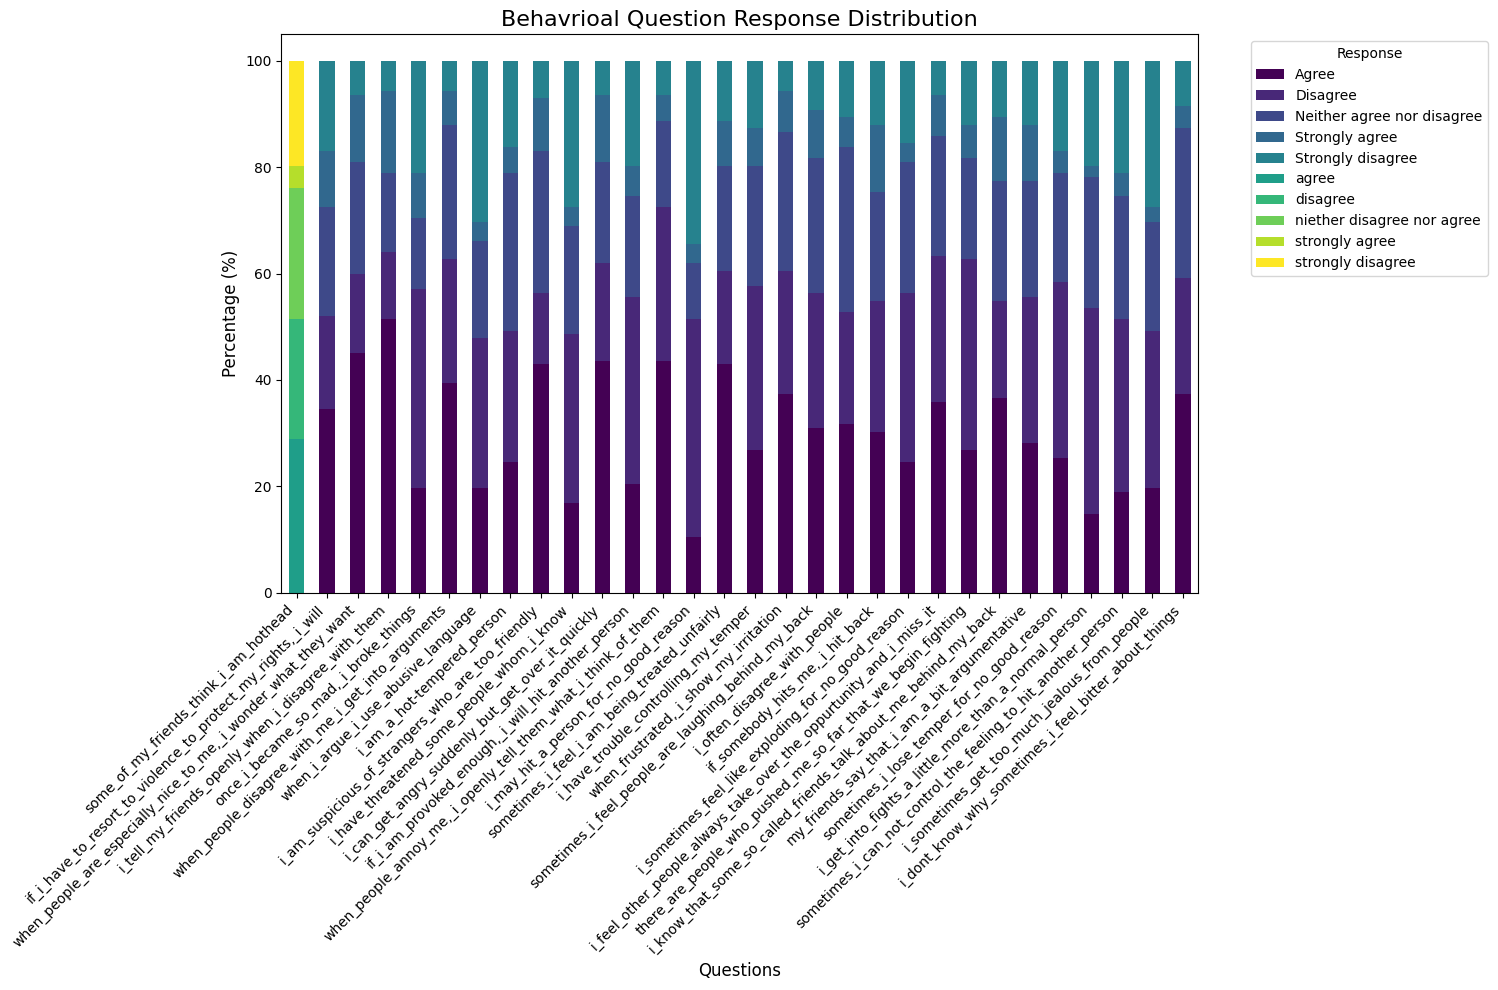

In [38]:
# Identify Likert-scale columns (revised)
likert_cols_all = [
    col for col in df.columns
    if df[col].astype(str).str.contains('agree|disagree|strongly', case=False, na=False).any()
]

# Aggregate response distributions for Likert-scale columns
likert_data = df[likert_cols_all].apply(lambda x: x.value_counts(normalize=True) * 100).T

# Plot stacked bar chart for Likert-scale responses
fig, ax = plt.subplots(figsize=(15, 10))
likert_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Customize the plot
ax.set_title('Behavrioal Question Response Distribution', fontsize=16)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xlabel('Questions', fontsize=12)
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


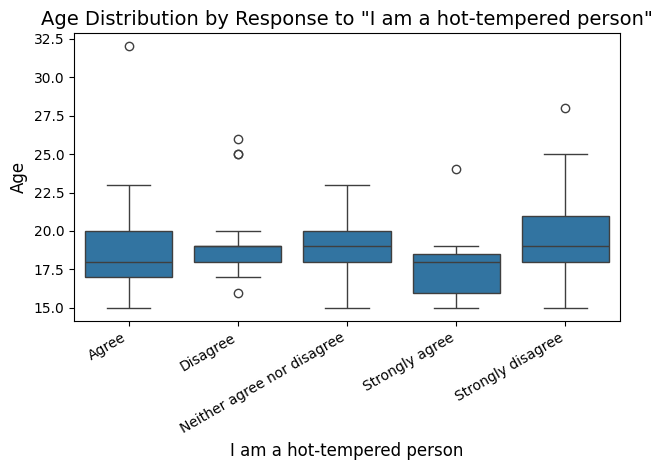

In [47]:


# Create the boxplot
sns.boxplot(data=df, x='i_am_a_hot-tempered_person', y='what_is_your_age')

# Improve the x-axis labels
plt.xlabel('I am a hot-tempered person', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Rotate the x-axis labels if necessary
plt.xticks(rotation=30, ha='right', fontsize=10)

# Add a title
plt.title('Age Distribution by Response to "I am a hot-tempered person"', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Dataset Columns:
Index(['Timestamp', 'What is your age?', 'Gender', 'Class',
       'City/ Residencial status', 'Type of Family',
       'What type of video games do you typically play?',
       'Name the video game you usually play ',
       'How many hours do you play Video Games in  a day?',
       'How much time do you play "violent" video games specifically?',
       'What changes on behaviour have you experienced in yourself after playing violent video games?',
       'Some of my Friends think I am hothead',
       'If I have to resort to violence to protect my rights, I will',
       'When people are especially nice to me, I wonder what they want',
       'I tell my friends openly when I disagree with them',
       'Once I became so mad, I broke things',
       'When people disagree with me I get into arguments',
       'When I argue I use abusive language', 'I am a hot-tempered person',
       'I am suspicious of strangers who are too friendly',
       'I have threatened some p

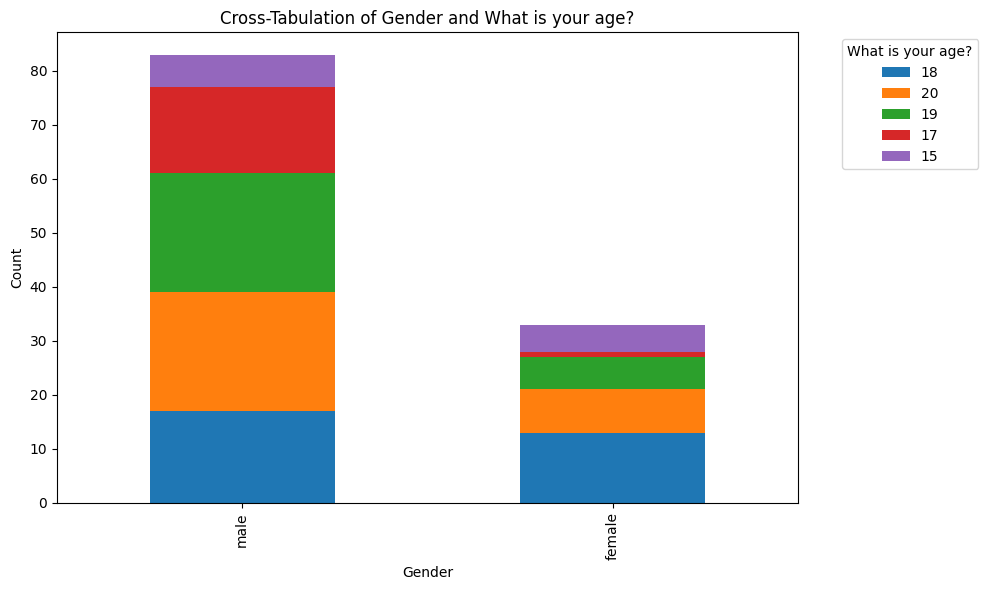

Chi-Square Test between Gender and I am a hot-tempered person
Chi-Square Statistic: 6.214612464158024
p-value: 0.1836839178285754
Degrees of Freedom: 4



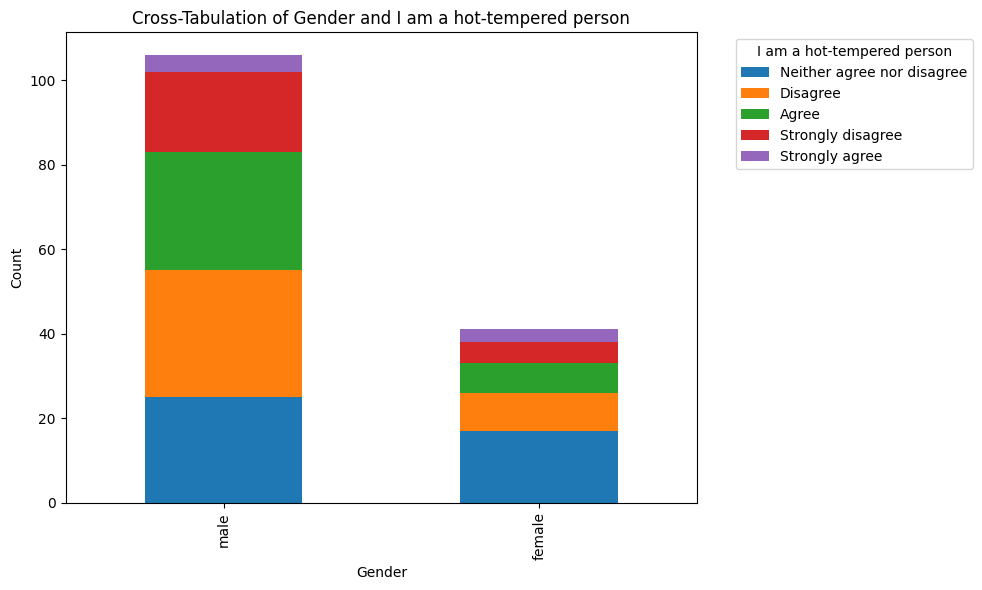

Chi-Square Test between Gender and When people disagree with me I get into arguments
Chi-Square Statistic: 1.649211919005983
p-value: 0.7999213182151912
Degrees of Freedom: 4



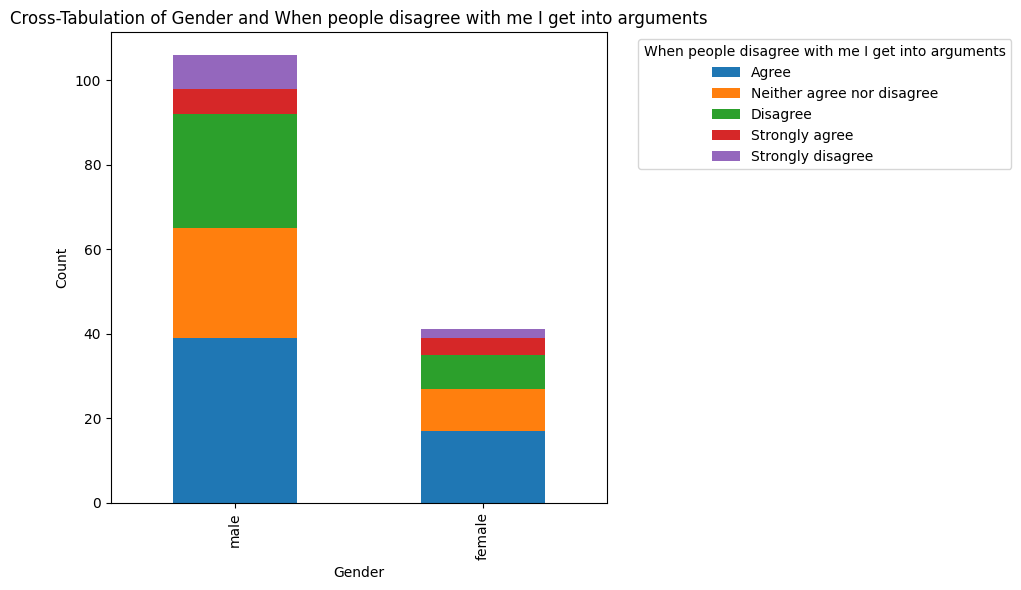

Chi-Square Test between Gender and If somebody hits me, I hit back
Chi-Square Statistic: 0.9869319609409429
p-value: 0.9117710150263869
Degrees of Freedom: 4



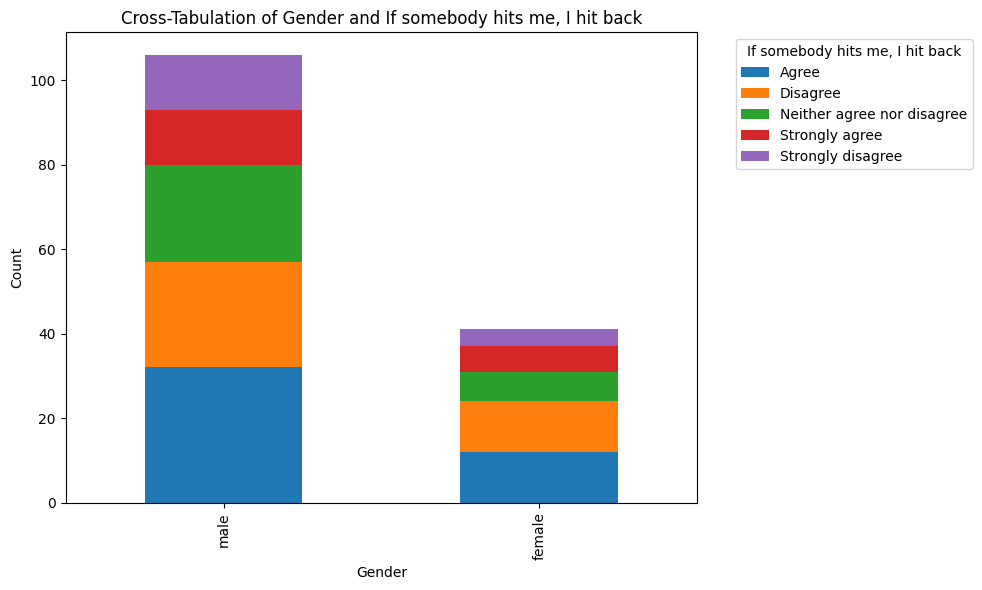

Chi-Square Test between Gender and Do you believe that playing violent video games can lead to aggressive behavior in real life?
Chi-Square Statistic: 0.14896515899025747
p-value: 0.6995262573156283
Degrees of Freedom: 1



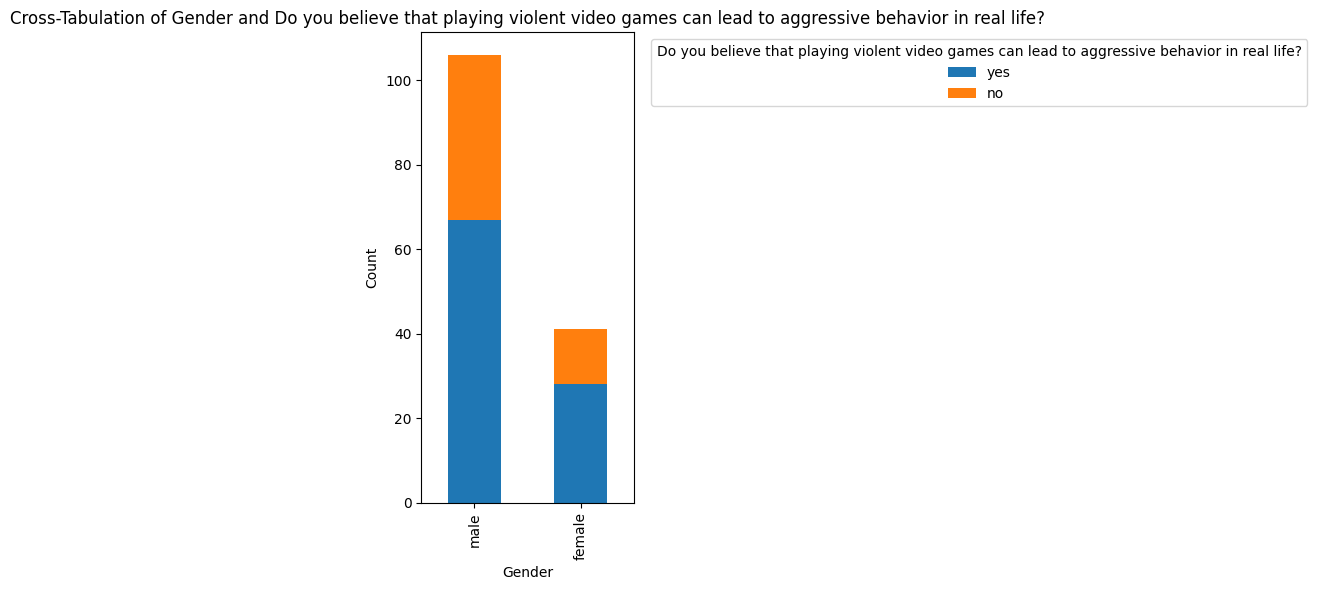

Chi-Square Test between What is your age? and Gender
Chi-Square Statistic: 26.558359706263797
p-value: 0.08765981862780868
Degrees of Freedom: 18



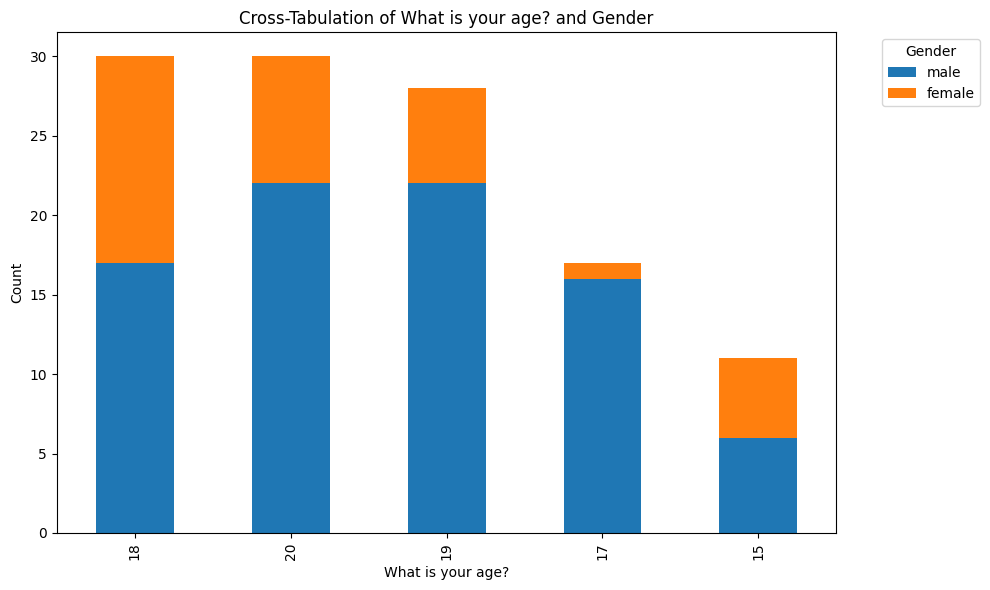

Chi-Square Test between What is your age? and I am a hot-tempered person
Chi-Square Statistic: 75.56128359385715
p-value: 0.36415125568563095
Degrees of Freedom: 72



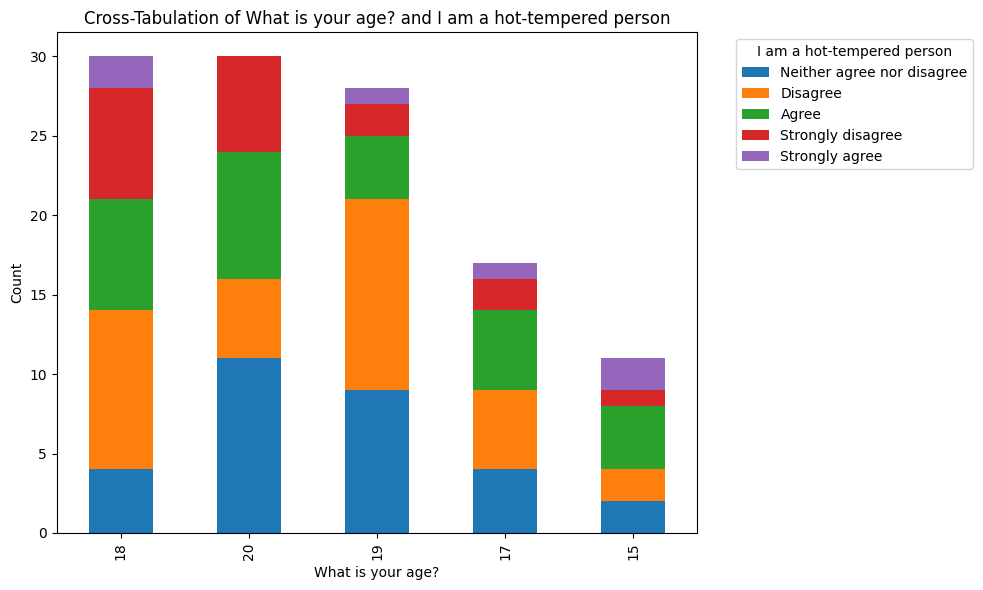

Chi-Square Test between What is your age? and When people disagree with me I get into arguments
Chi-Square Statistic: 93.79804812834223
p-value: 0.0432348268278145
Degrees of Freedom: 72



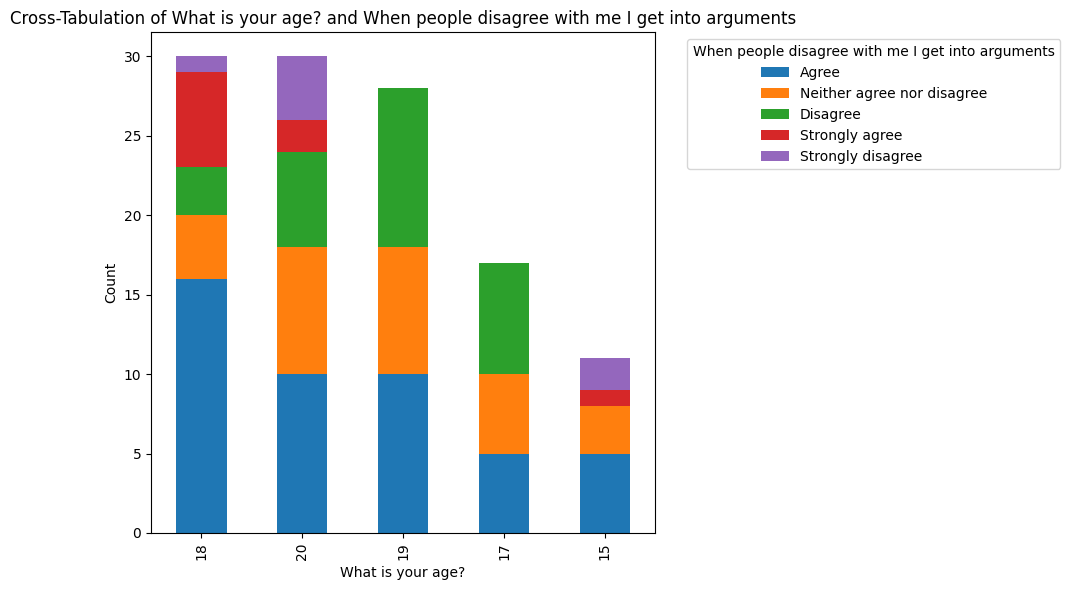

Chi-Square Test between What is your age? and If somebody hits me, I hit back
Chi-Square Statistic: 68.98150939314658
p-value: 0.5790079903231587
Degrees of Freedom: 72



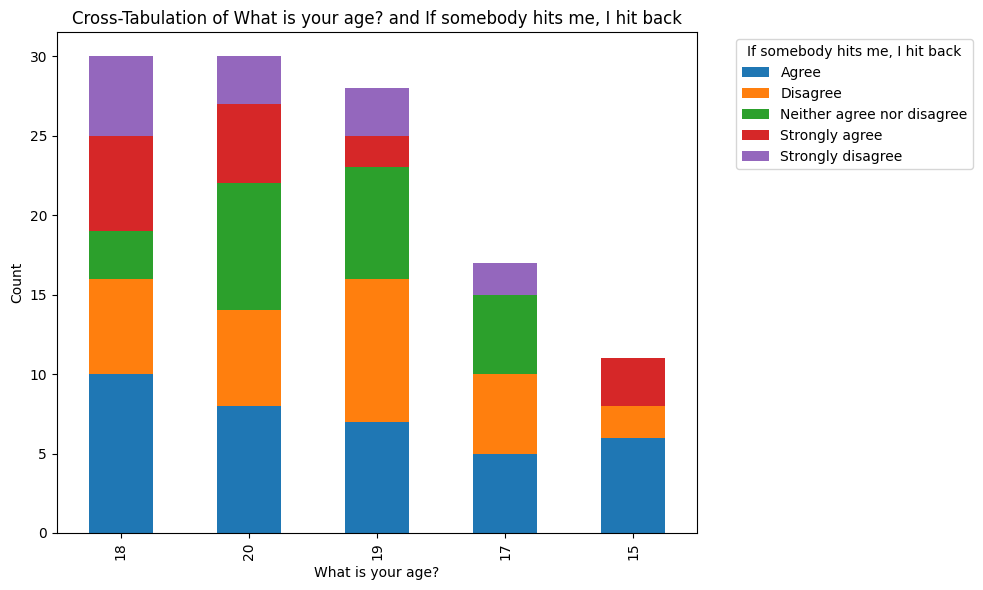

Chi-Square Test between What is your age? and Do you believe that playing violent video games can lead to aggressive behavior in real life?
Chi-Square Statistic: 23.47310474355366
p-value: 0.17305837924631112
Degrees of Freedom: 18



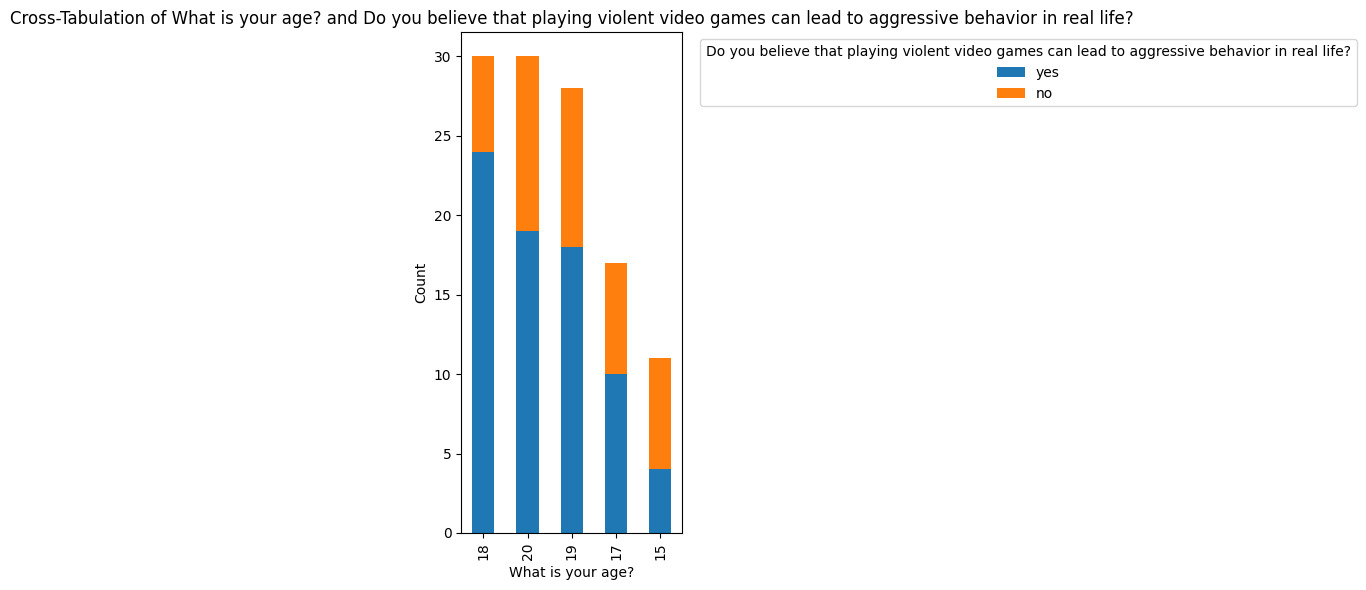

Chi-Square Test between I am a hot-tempered person and Gender
Chi-Square Statistic: 6.214612464158024
p-value: 0.1836839178285754
Degrees of Freedom: 4



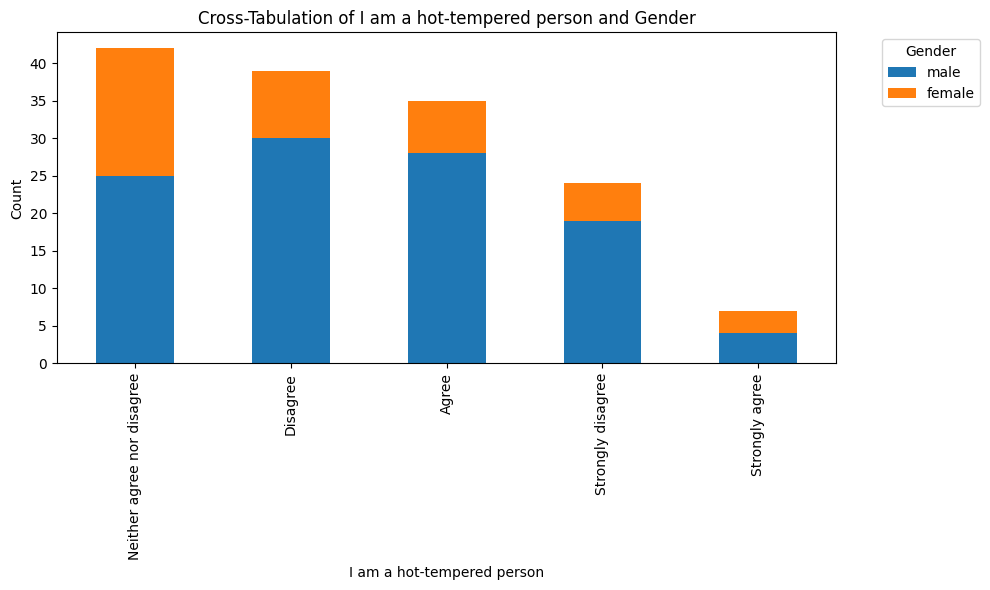

Chi-Square Test between I am a hot-tempered person and What is your age?
Chi-Square Statistic: 75.56128359385715
p-value: 0.36415125568563095
Degrees of Freedom: 72



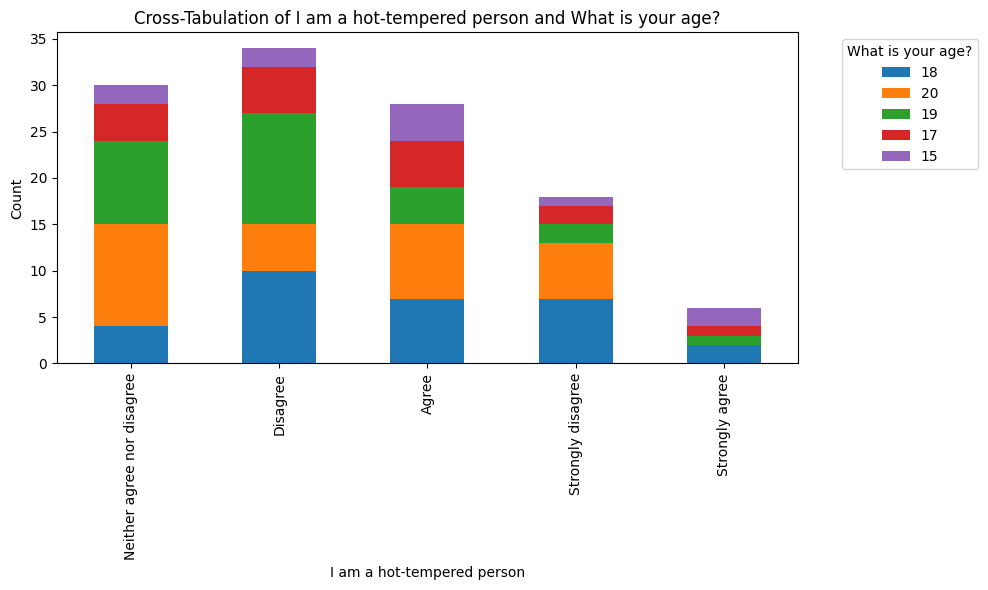

Chi-Square Test between I am a hot-tempered person and When people disagree with me I get into arguments
Chi-Square Statistic: 19.94877670940171
p-value: 0.222536591949422
Degrees of Freedom: 16



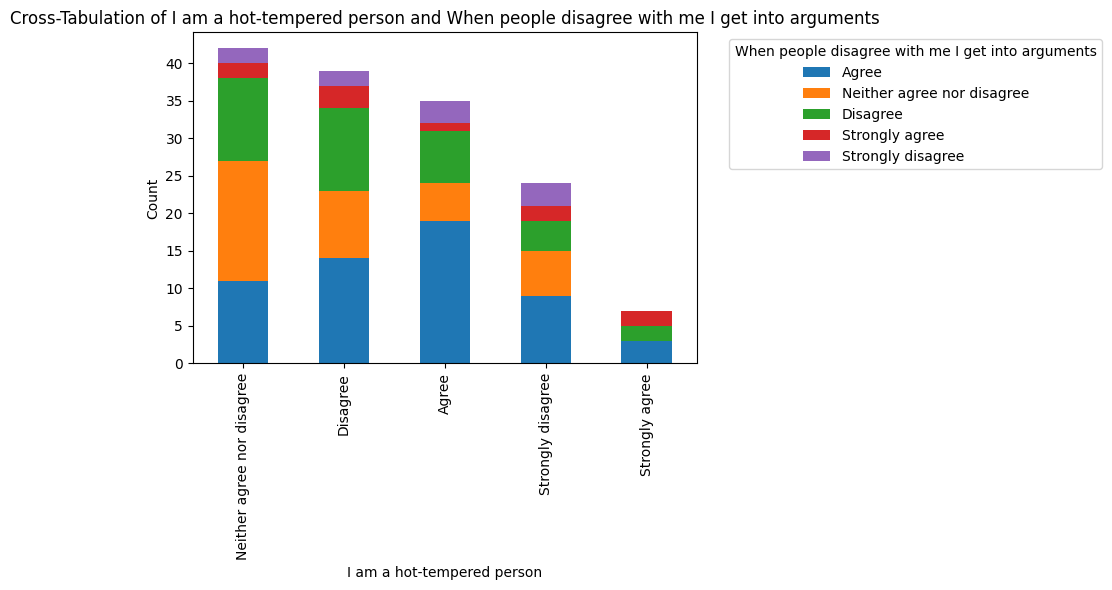

Chi-Square Test between I am a hot-tempered person and If somebody hits me, I hit back
Chi-Square Statistic: 21.487891203816126
p-value: 0.16050972809220346
Degrees of Freedom: 16



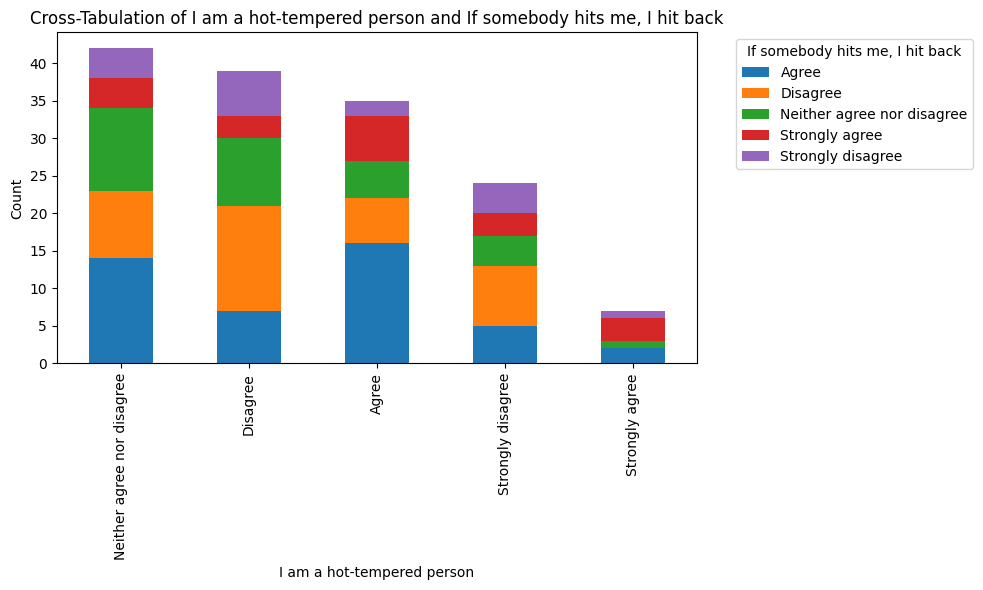

Chi-Square Test between I am a hot-tempered person and Do you believe that playing violent video games can lead to aggressive behavior in real life?
Chi-Square Statistic: 4.630030753659295
p-value: 0.32740638416695017
Degrees of Freedom: 4



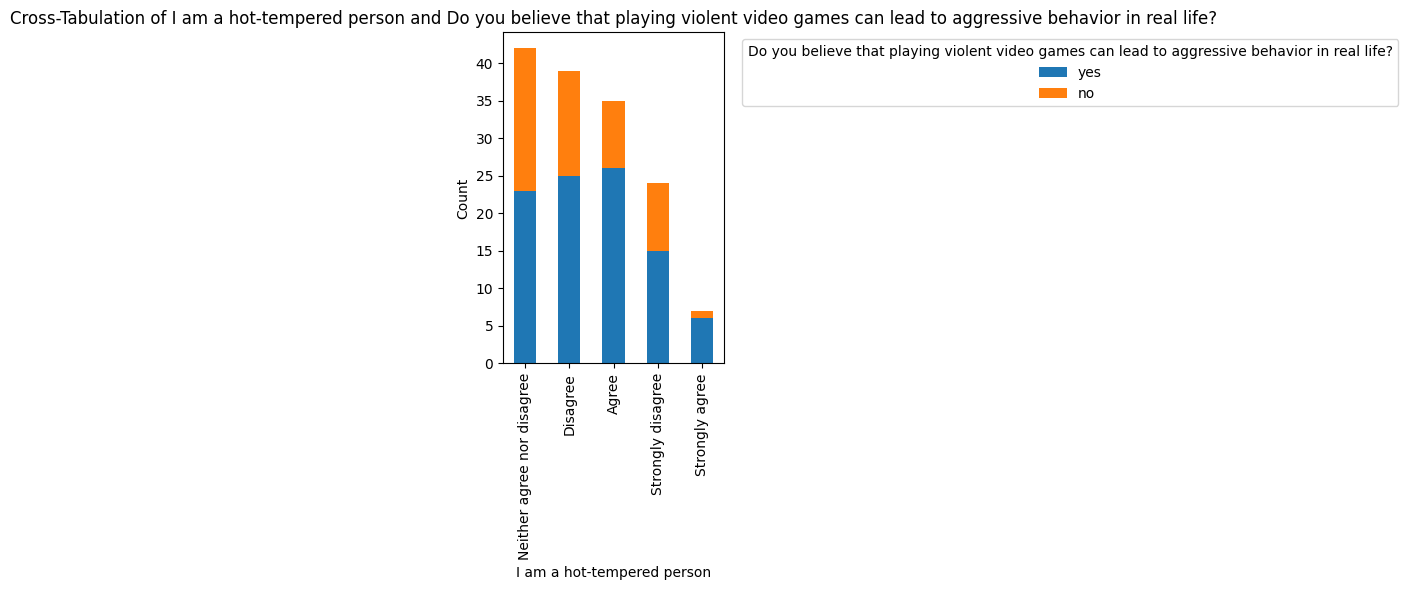

Chi-Square Test between When people disagree with me I get into arguments and Gender
Chi-Square Statistic: 1.6492119190059829
p-value: 0.7999213182151912
Degrees of Freedom: 4



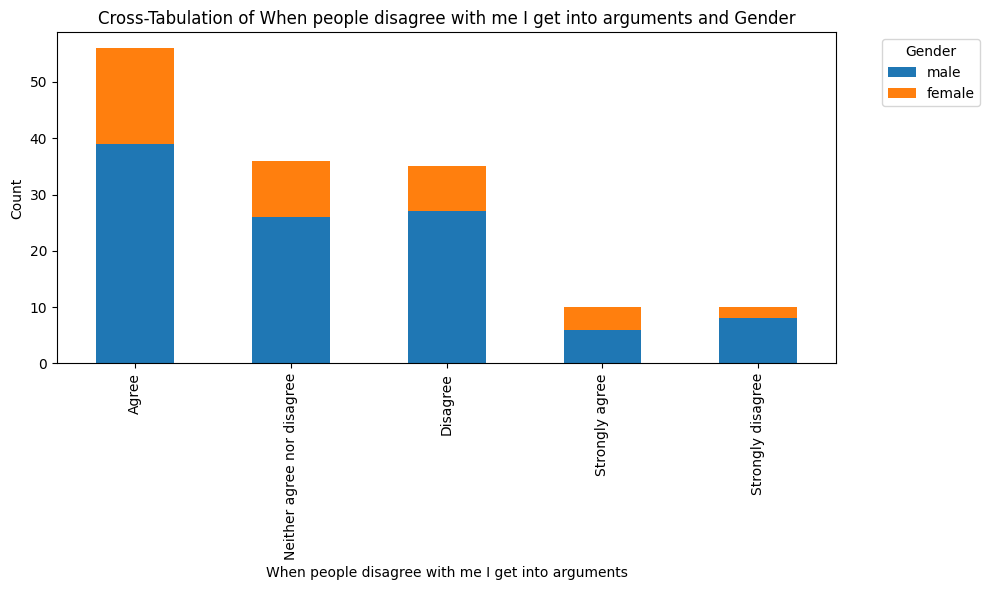

Chi-Square Test between When people disagree with me I get into arguments and What is your age?
Chi-Square Statistic: 93.79804812834223
p-value: 0.0432348268278145
Degrees of Freedom: 72



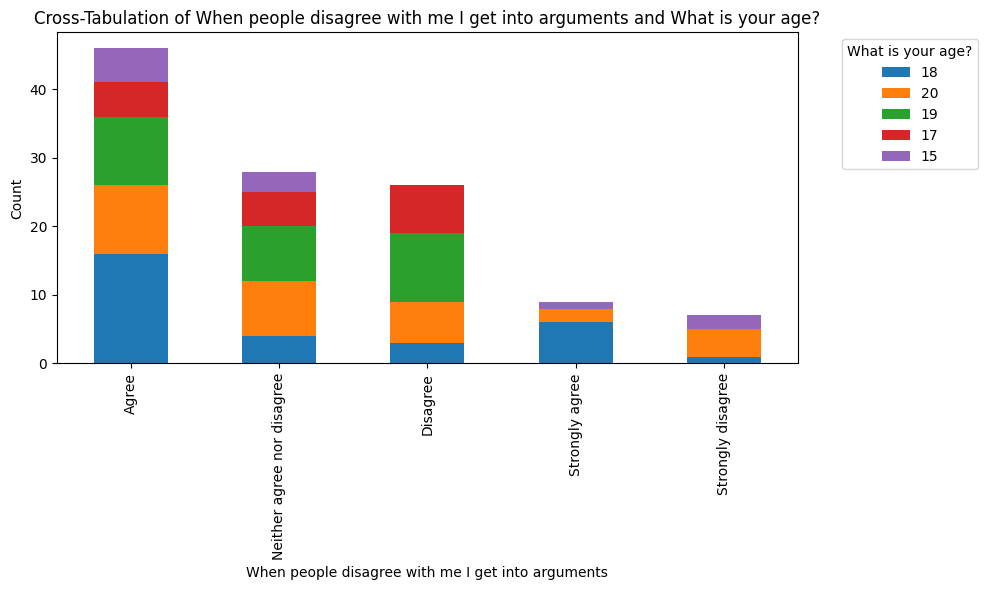

Chi-Square Test between When people disagree with me I get into arguments and I am a hot-tempered person
Chi-Square Statistic: 19.948776709401706
p-value: 0.2225365919494223
Degrees of Freedom: 16



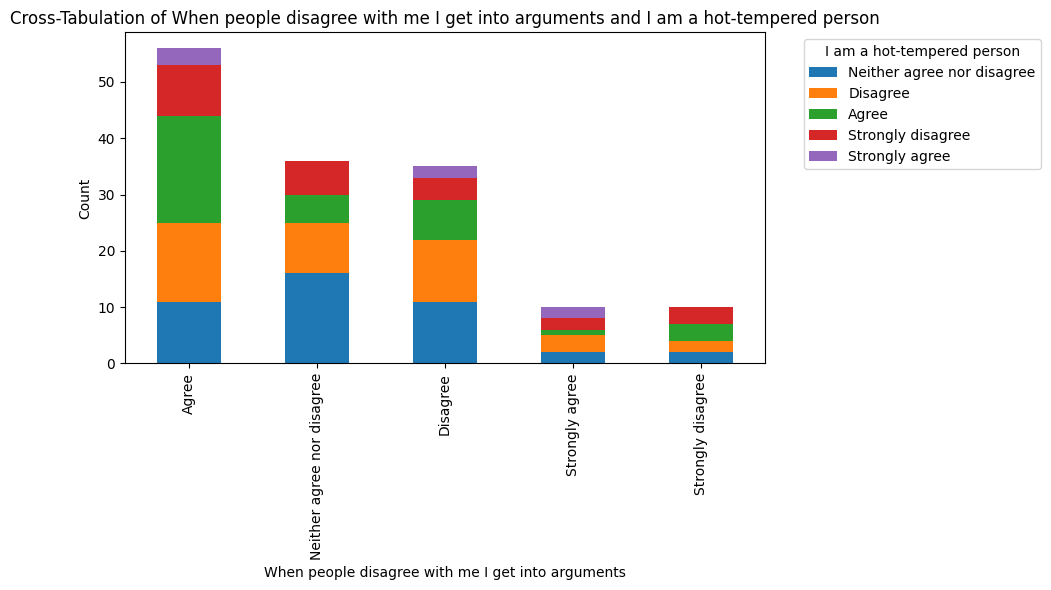

Chi-Square Test between When people disagree with me I get into arguments and If somebody hits me, I hit back
Chi-Square Statistic: 34.80202213225046
p-value: 0.004229692436298146
Degrees of Freedom: 16



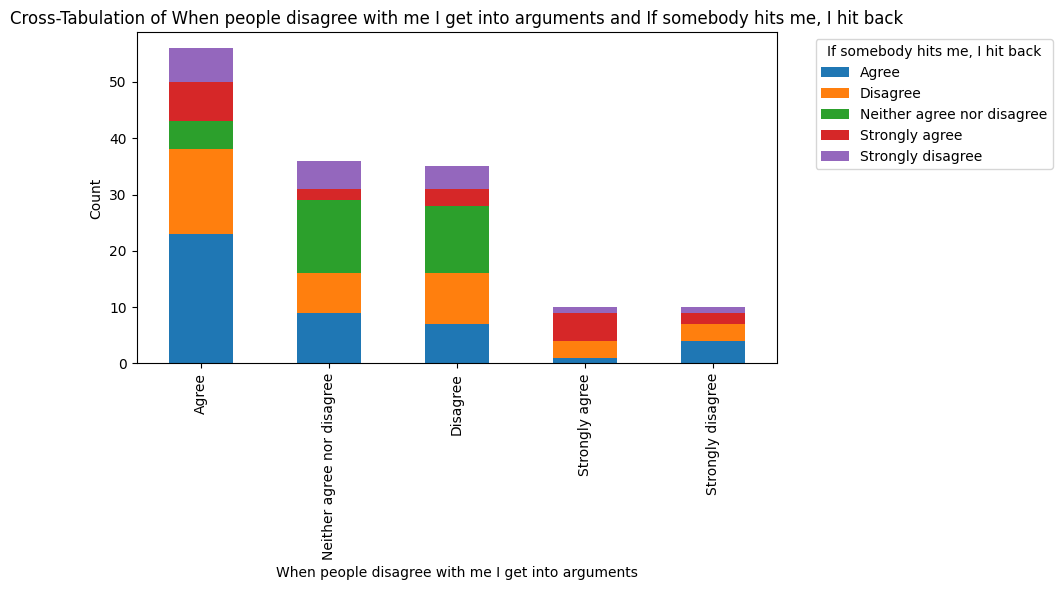

Chi-Square Test between When people disagree with me I get into arguments and Do you believe that playing violent video games can lead to aggressive behavior in real life?
Chi-Square Statistic: 7.06086032388664
p-value: 0.1327067770523991
Degrees of Freedom: 4



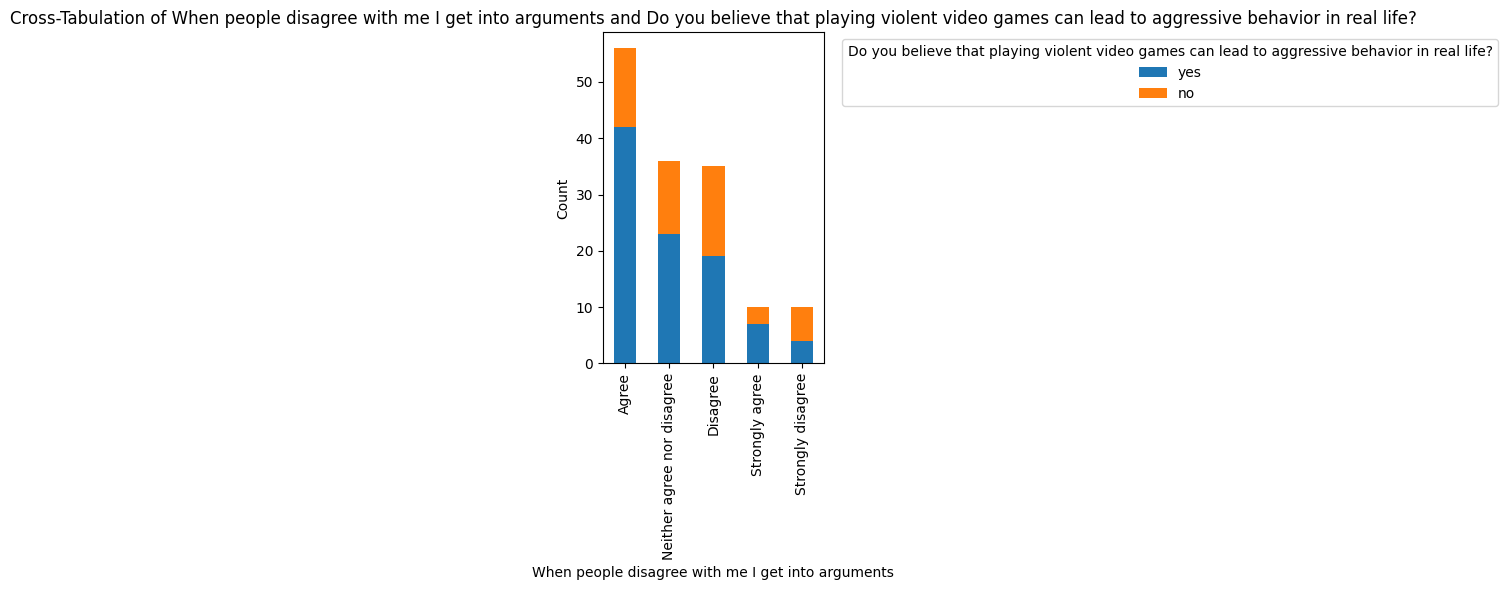

Chi-Square Test between If somebody hits me, I hit back and Gender
Chi-Square Statistic: 0.9869319609409428
p-value: 0.9117710150263869
Degrees of Freedom: 4



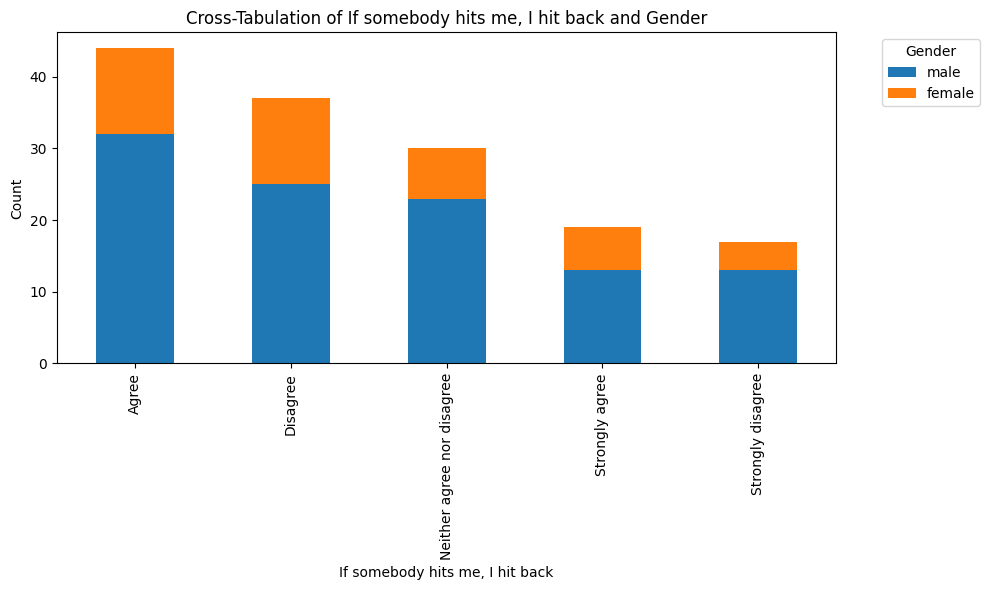

Chi-Square Test between If somebody hits me, I hit back and What is your age?
Chi-Square Statistic: 68.98150939314657
p-value: 0.5790079903231592
Degrees of Freedom: 72



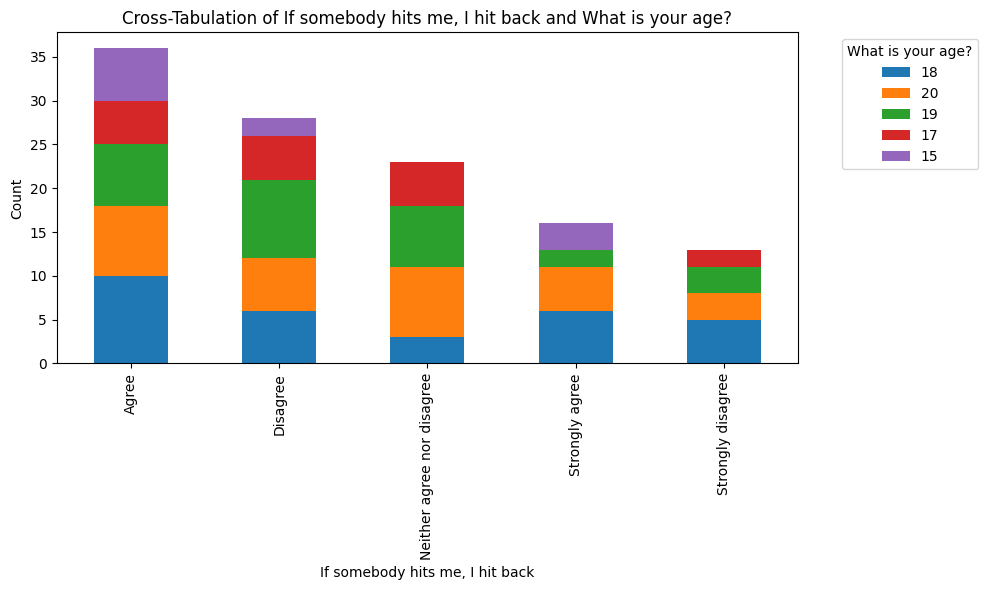

Chi-Square Test between If somebody hits me, I hit back and I am a hot-tempered person
Chi-Square Statistic: 21.487891203816126
p-value: 0.16050972809220346
Degrees of Freedom: 16



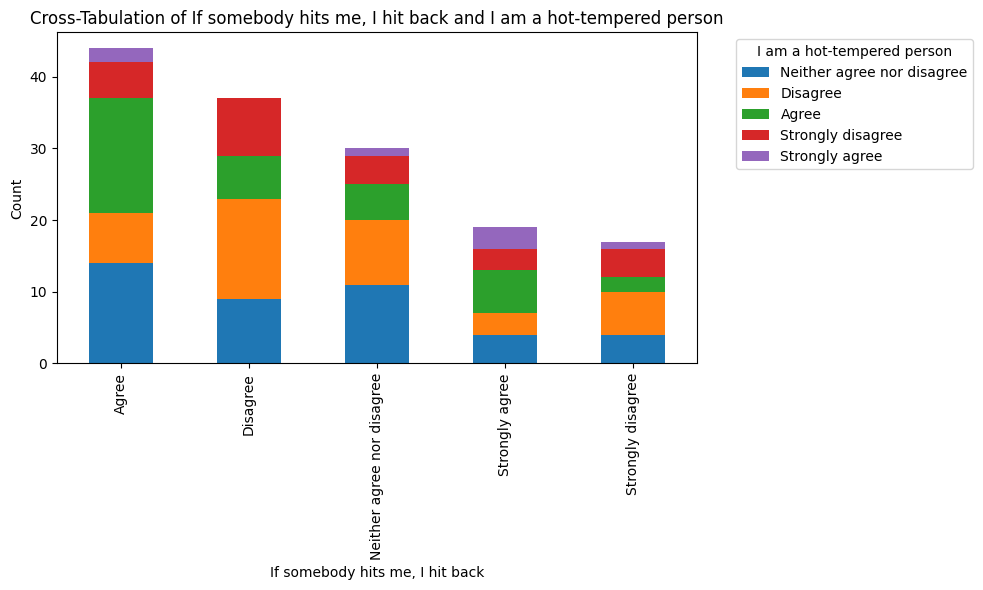

Chi-Square Test between If somebody hits me, I hit back and When people disagree with me I get into arguments
Chi-Square Statistic: 34.80202213225046
p-value: 0.004229692436298146
Degrees of Freedom: 16



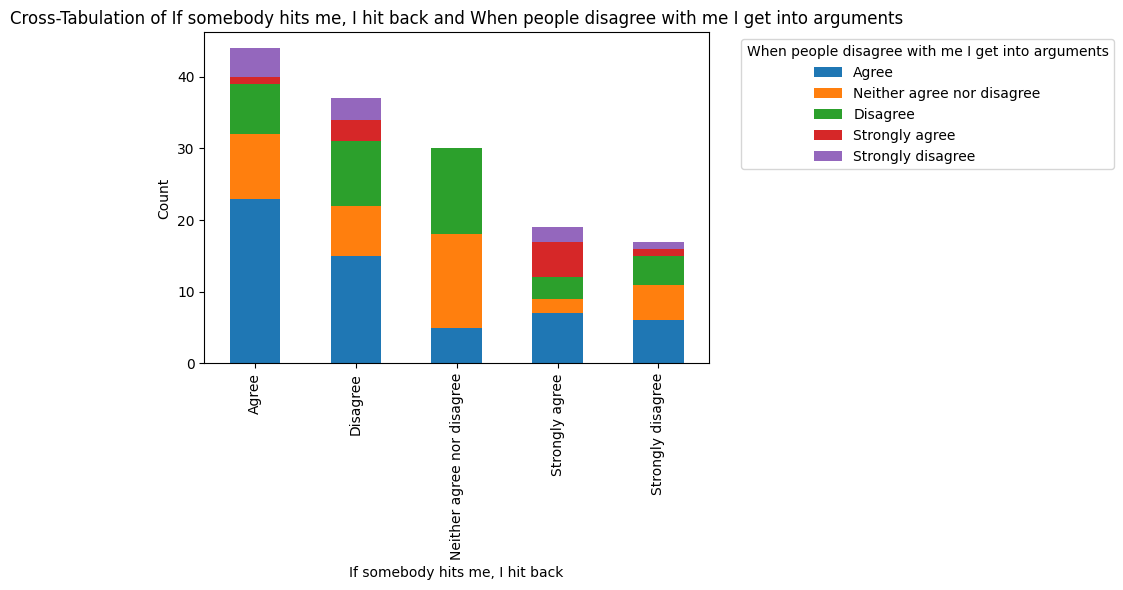

Chi-Square Test between If somebody hits me, I hit back and Do you believe that playing violent video games can lead to aggressive behavior in real life?
Chi-Square Statistic: 6.194580439675357
p-value: 0.18508050495813427
Degrees of Freedom: 4



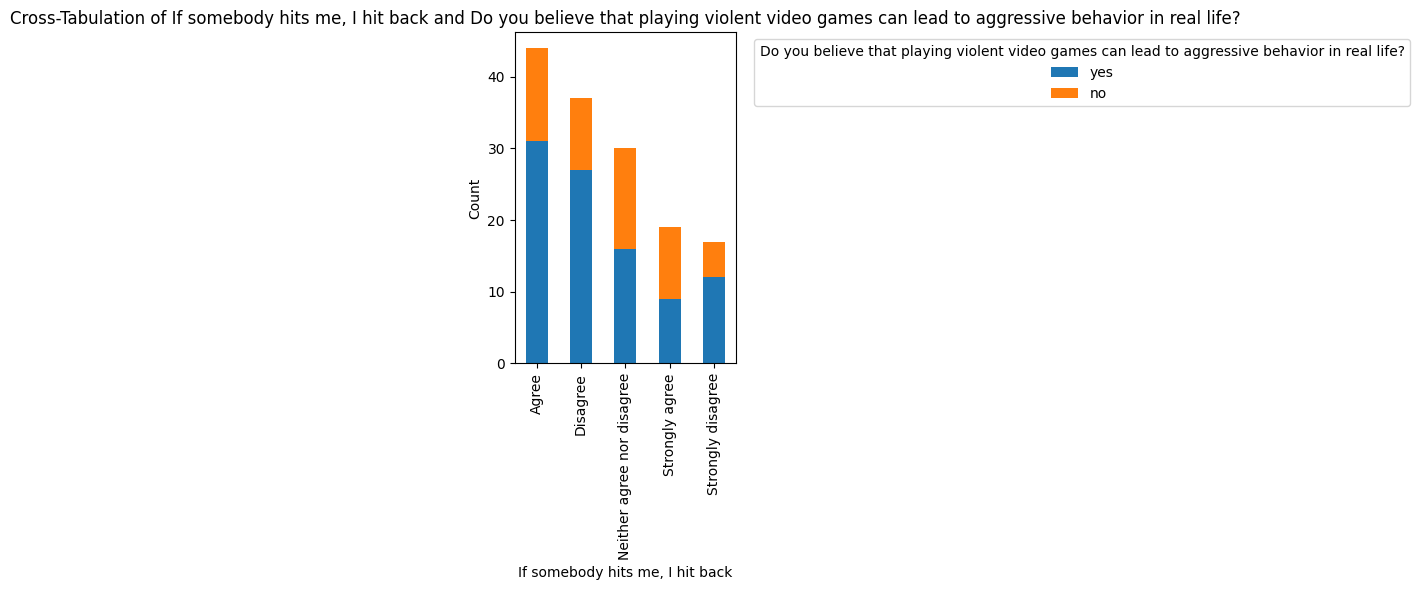

Chi-Square Test between Do you believe that playing violent video games can lead to aggressive behavior in real life? and Gender
Chi-Square Statistic: 0.14896515899025747
p-value: 0.6995262573156283
Degrees of Freedom: 1



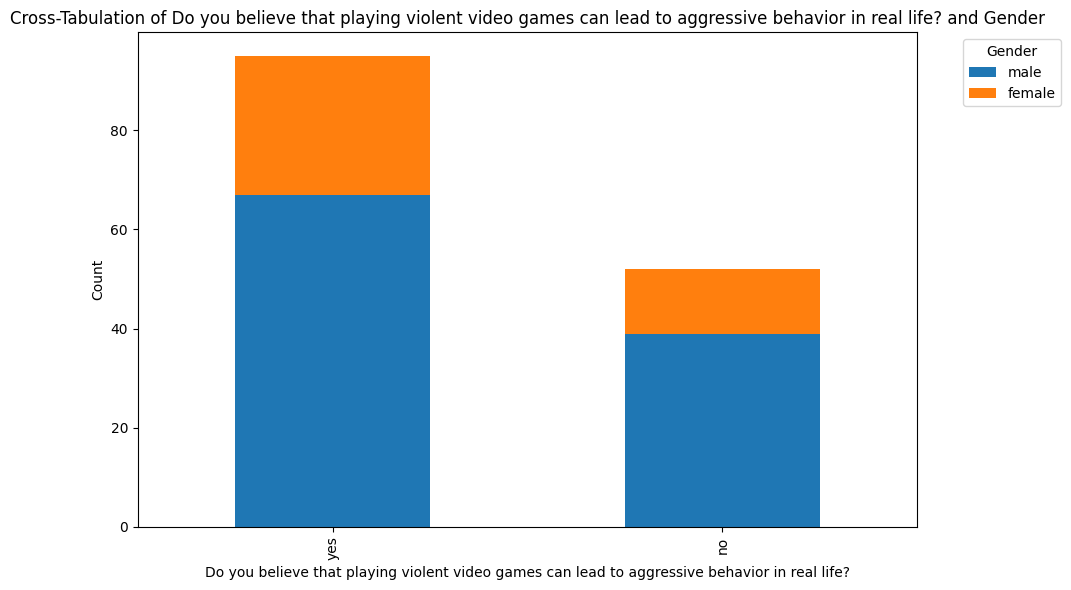

Chi-Square Test between Do you believe that playing violent video games can lead to aggressive behavior in real life? and What is your age?
Chi-Square Statistic: 23.473104743553655
p-value: 0.1730583792463112
Degrees of Freedom: 18



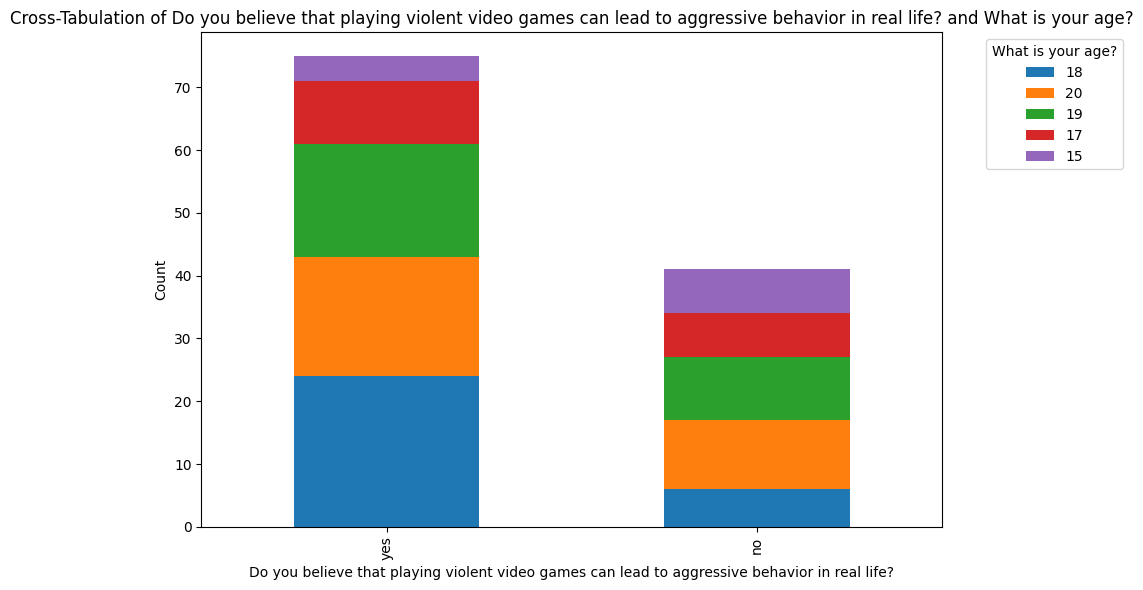

Chi-Square Test between Do you believe that playing violent video games can lead to aggressive behavior in real life? and I am a hot-tempered person
Chi-Square Statistic: 4.630030753659295
p-value: 0.32740638416695017
Degrees of Freedom: 4



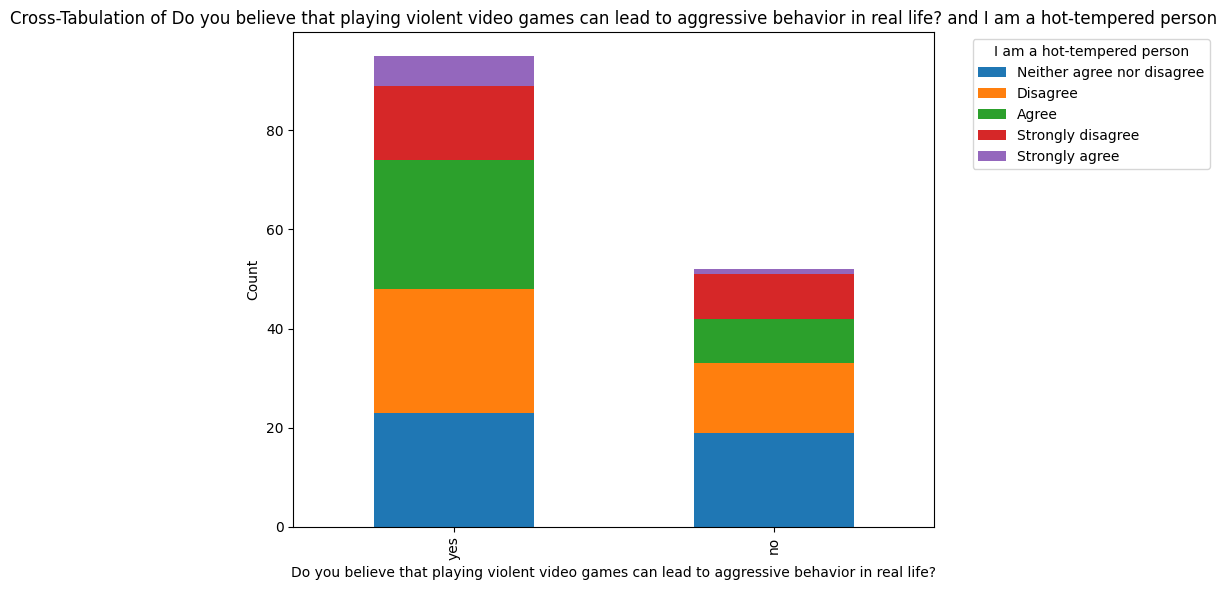

Chi-Square Test between Do you believe that playing violent video games can lead to aggressive behavior in real life? and When people disagree with me I get into arguments
Chi-Square Statistic: 7.060860323886641
p-value: 0.13270677705239903
Degrees of Freedom: 4



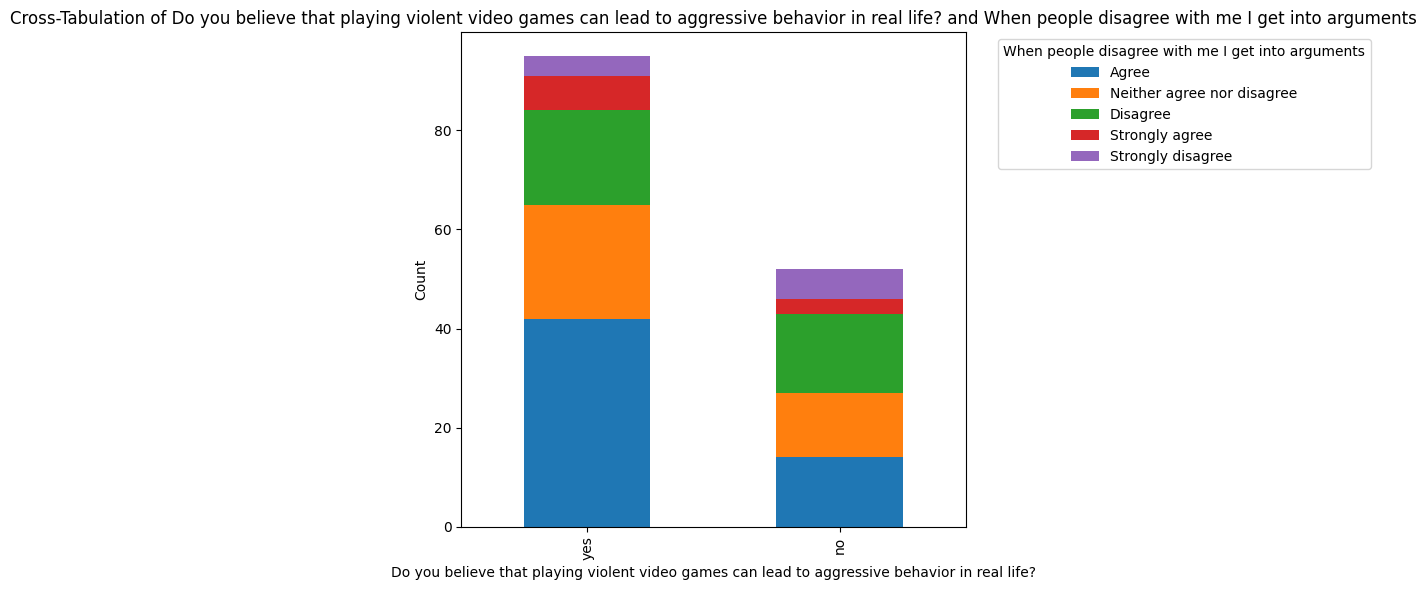

Chi-Square Test between Do you believe that playing violent video games can lead to aggressive behavior in real life? and If somebody hits me, I hit back
Chi-Square Statistic: 6.194580439675356
p-value: 0.1850805049581343
Degrees of Freedom: 4



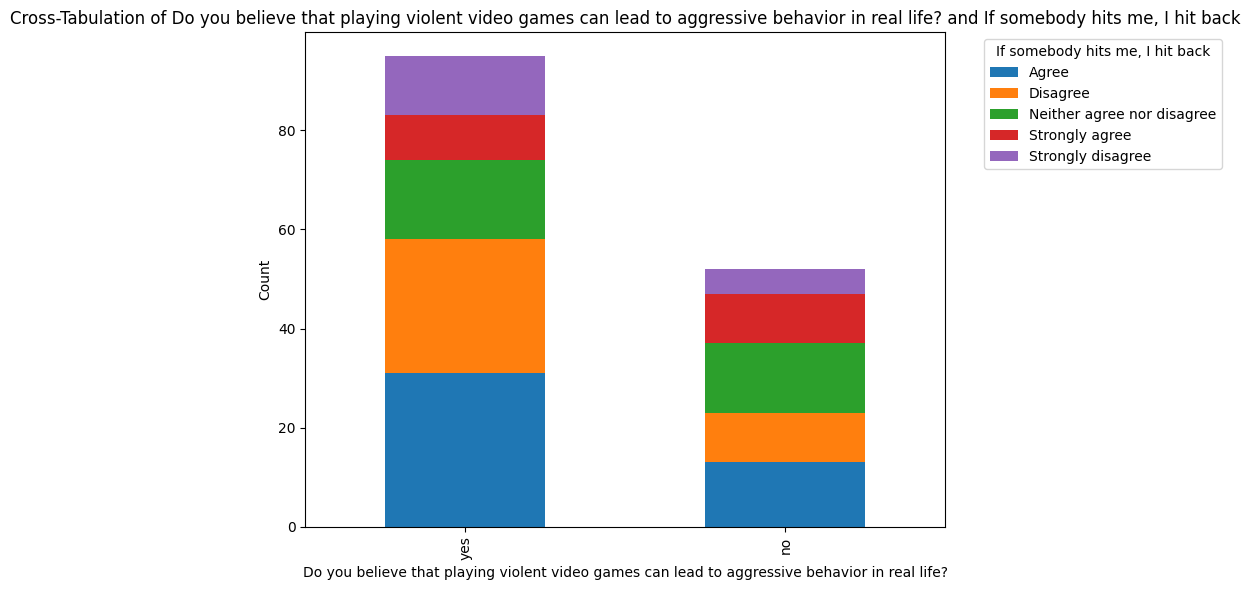

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jacksonsorenson/Documents/Pyhton Projects/Video Game Agression/Effects of Violent Video Games On Aggression CSV MSDOS.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Print column names to verify
print("Dataset Columns:")
print(data.columns)

# Update relevant columns based on actual dataset
relevant_columns = [
    'Gender',  # Update this to match your dataset
    'What is your age?',
    'I am a hot-tempered person',
    'When people disagree with me I get into arguments',
    'If somebody hits me, I hit back',
    'Do you believe that playing violent video games can lead to aggressive behavior in real life?',
    # Add other relevant columns here based on the dataset
]

# Function to visualize cross-tabulation (top 5 categories)
def visualize_crosstab_top5(col1, col2, cross_tab):
    # Select the top 5 rows and columns by frequency
    top5_rows = cross_tab.sum(axis=1).nlargest(5).index
    top5_cols = cross_tab.sum(axis=0).nlargest(5).index
    cross_tab = cross_tab.loc[top5_rows, top5_cols]
    
    # Create a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Cross-Tabulation of {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Perform Chi-Square Test and visualize meaningful pairs
for col1 in relevant_columns:
    for col2 in relevant_columns:
        if col1 != col2:  # Skip self-comparisons
            # Create cross-tabulation
            cross_tab = pd.crosstab(data[col1], data[col2])

            try:
                # Perform Chi-Square Test
                chi2, p, dof, expected = chi2_contingency(cross_tab)

                # Print results
                print(f'Chi-Square Test between {col1} and {col2}')
                print(f'Chi-Square Statistic: {chi2}')
                print(f'p-value: {p}')
                print(f'Degrees of Freedom: {dof}\n')

                # Visualize the cross-tabulation for top 5 categories
                visualize_crosstab_top5(col1, col2, cross_tab)

            except ValueError:
                print(f"Skipping {col1} and {col2}: Insufficient data for Chi-Square Test.\n")
